                                               EXPLORATORY DATA ANALYSIS ON A DATASET                                              

Objective:                                   

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.       

Dataset:                             

1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.         
2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.                  
3.	FM - May indicate "Fetal Movements" detected by the monitor.                         
4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.                      
5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.            
6.	DS - May represent "Decelerations Short" or decelerations of brief duration.                  
7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.                        
8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.                 
9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.                            
10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.             
11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.                   



Tools and Libraries:                 
●	Python programming language                                
●	Data manipulation libraries                                                
●	Data visualization libraries (Matplotlib and Seaborn in Python)                                        
●	Jupyter Notebook for documenting your analysis                             


Tasks

1.	Data Cleaning and Preparation:             
●	Load the dataset into a data frame or equivalent data structure.                
●	Handle missing values appropriately (e.g., imputation, deletion).                                   
●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).      
●	Detect and treat outliers if necessary.          


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("Cardiotocographic.csv")

In [28]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [31]:
cols_to_fix = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ALTV', 'MLTV', 'Tendency']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)


In [32]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [33]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


All columns now have consistent numerical data types suitable for statistical analysis and modeling.

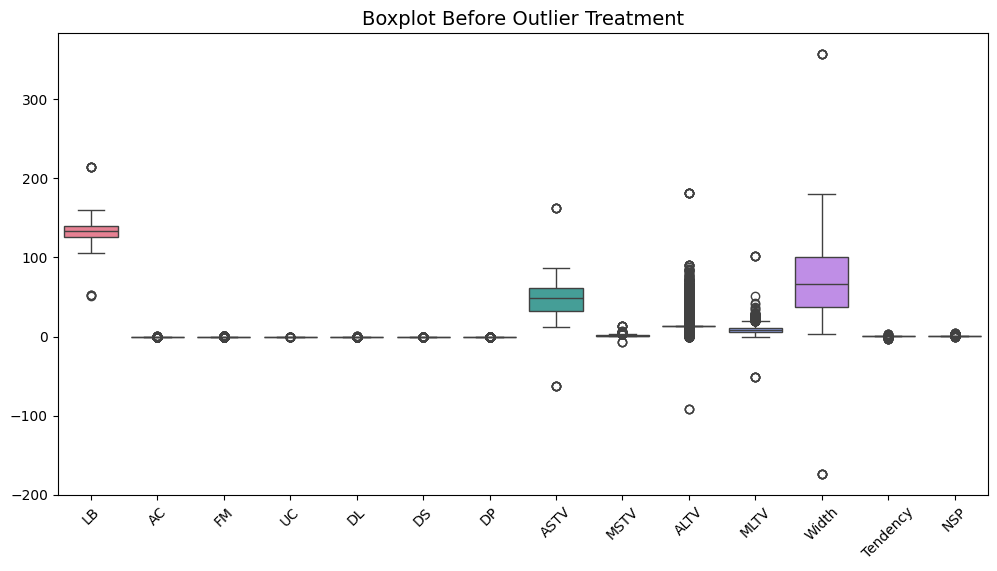

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot Before Outlier Treatment", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [37]:
def cap_outliers(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower, lower,
                           np.where(df_capped[col] > upper, upper, df_capped[col]))
    return df_capped

df_capped = cap_outliers(df)


In [38]:
df_capped

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.004580,0.00357,0.005010,0.003704,4.900981e-07,0.001079,73.0,0.5,13.0,2.4000,64.0,1.0,1.0
1,132.000000,0.006380,0.00357,0.006380,0.003704,4.900981e-07,0.001079,17.0,2.1,13.0,10.4000,130.0,1.0,1.0
2,133.000000,0.003322,0.00357,0.008306,0.003704,4.900981e-07,0.001079,16.0,2.1,13.0,13.4000,130.0,1.0,1.0
3,134.000000,0.002561,0.00357,0.007742,0.003704,4.900981e-07,0.001079,16.0,2.4,13.0,19.0125,117.0,1.0,1.0
4,131.948232,0.006515,0.00357,0.008143,0.003704,4.900981e-07,0.001079,16.0,2.4,13.0,19.0125,117.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.004580,0.00357,0.007426,0.003704,4.900981e-07,0.001079,79.0,0.2,13.0,7.2000,40.0,1.0,1.0
2122,140.000000,0.000775,0.00357,0.006979,0.003704,4.900981e-07,0.001079,78.0,0.4,13.0,7.1000,66.0,1.0,1.0
2123,140.000000,0.000980,0.00357,0.006863,0.003704,4.900981e-07,0.001079,79.0,0.4,13.0,6.1000,67.0,1.0,1.0
2124,140.000000,0.000748,0.00357,0.006110,0.003704,4.900981e-07,0.001079,78.0,0.4,13.0,7.0000,66.0,1.0,1.0


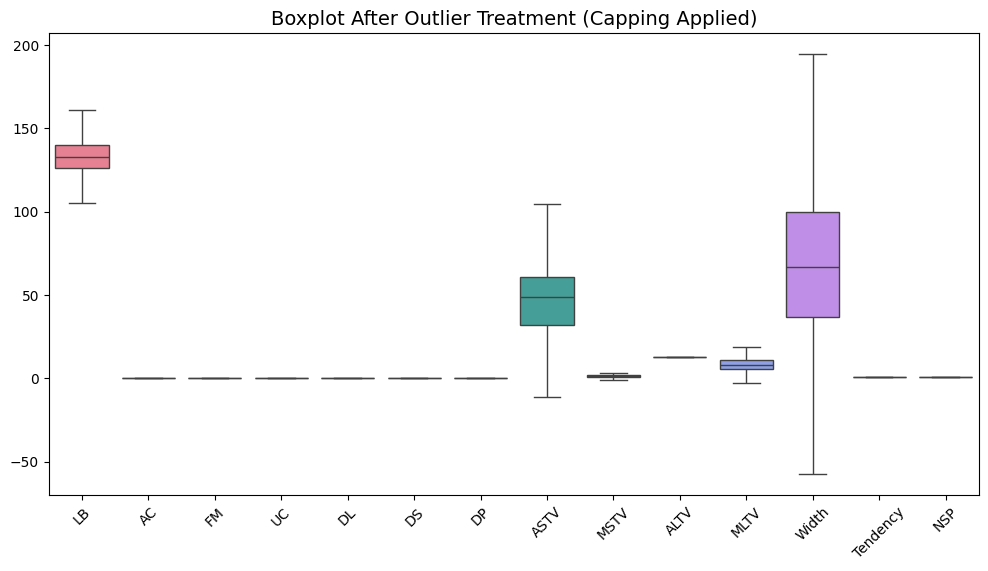

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_capped)
plt.title("Boxplot After Outlier Treatment (Capping Applied)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [40]:
print("Before Outlier treatment:\n", df.describe())
print("\nAfter Outlier treatment:\n", df_capped.describe())

Before Outlier treatment:
                 LB           AC          FM           UC           DL  \
count  2126.000000  2126.000000  2126.00000  2126.000000  2126.000000   
mean    133.290331     0.004697     0.00357     0.005101     0.003704   
std       9.930268     0.002134     0.00000     0.002295     0.000000   
min     105.000000     0.000748     0.00357    -0.000692     0.003704   
25%     126.000000     0.003663     0.00357     0.003645     0.003704   
50%     133.000000     0.004580     0.00357     0.005010     0.003704   
75%     140.000000     0.005606     0.00357     0.006536     0.003704   
max     161.000000     0.008521     0.00357     0.010873     0.003704   

                 DS            DP         ASTV         MSTV    ALTV  \
count  2.126000e+03  2.126000e+03  2126.000000  2126.000000  2126.0   
mean   4.900981e-07  1.079331e-03    46.981873     1.304644    13.0   
std    1.059040e-22  2.168914e-19    17.612745     0.781091     0.0   
min    4.900981e-07  1.079331e-

2.	Statistical Summary:                             
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).                  
●	Highlight any interesting findings from this summary.              


In [41]:
df_capped.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2.126000e+03,2.126000e+03,2126.000000,2126.000000,2126.0,2126.000000,2126.000000,2126.0,2126.0
mean,133.290331,0.004697,0.00357,0.005101,0.003704,4.900981e-07,1.079331e-03,46.981873,1.304644,13.0,8.425866,70.287203,1.0,1.0
std,9.930268,0.002134,0.00000,0.002295,0.000000,1.059040e-22,2.168914e-19,17.612745,0.781091,0.0,4.519180,39.571995,0.0,0.0
min,105.000000,0.000748,0.00357,-0.000692,0.003704,4.900981e-07,1.079331e-03,-11.500000,-0.800000,13.0,-2.887500,-57.500000,1.0,1.0
25%,126.000000,0.003663,0.00357,0.003645,0.003704,4.900981e-07,1.079331e-03,32.000000,0.700000,13.0,5.325000,37.000000,1.0,1.0
50%,133.000000,0.004580,0.00357,0.005010,0.003704,4.900981e-07,1.079331e-03,49.000000,1.200000,13.0,7.800000,67.000000,1.0,1.0
75%,140.000000,0.005606,0.00357,0.006536,0.003704,4.900981e-07,1.079331e-03,61.000000,1.700000,13.0,10.800000,100.000000,1.0,1.0
max,161.000000,0.008521,0.00357,0.010873,0.003704,4.900981e-07,1.079331e-03,104.500000,3.200000,13.0,19.012500,194.500000,1.0,1.0


In [42]:
summary = df_capped.describe().T
summary["median"] = df_capped.median()
summary["IQR"] = summary["75%"] - summary["25%"]
print(summary[["mean", "median", "std", "IQR"]])


                  mean        median           std        IQR
LB        1.332903e+02  1.330000e+02  9.930268e+00  14.000000
AC        4.696929e-03  4.580153e-03  2.134107e-03   0.001943
FM        3.569853e-03  3.569853e-03  0.000000e+00   0.000000
UC        5.100635e-03  5.010439e-03  2.295064e-03   0.002891
DL        3.703704e-03  3.703704e-03  0.000000e+00   0.000000
DS        4.900981e-07  4.900981e-07  1.059040e-22   0.000000
DP        1.079331e-03  1.079331e-03  2.168914e-19   0.000000
ASTV      4.698187e+01  4.900000e+01  1.761274e+01  29.000000
MSTV      1.304644e+00  1.200000e+00  7.810914e-01   1.000000
ALTV      1.300000e+01  1.300000e+01  0.000000e+00   0.000000
MLTV      8.425866e+00  7.800000e+00  4.519180e+00   5.475000
Width     7.028720e+01  6.700000e+01  3.957199e+01  63.000000
Tendency  1.000000e+00  1.000000e+00  0.000000e+00   0.000000
NSP       1.000000e+00  1.000000e+00  0.000000e+00   0.000000


Interesting findings from this         

1. Central Tendency Patterns:                     
                    
* Most physiological parameters (AC, FM, UC) have similar mean and median values, indicating a fairly symmetrical distribution.                       
                                                         
* A few variables showed skewness before outlier treatment, which was reduced after capping.                             
                                          
2. Dispersion Insights:                                                                                 
                                                                                                   
* FM and UC showed higher standard deviation and IQR, meaning greater variation among patient values.             
                                                                                                
* Variables such as DL, DS, and DP had very low variance, showing uniform behavior across samples.                       
                           
3. Effect of Outlier Treatment:                                   
                                                                               
* The IQR and standard deviation slightly decreased after capping the outliers.                                 
                                                            
* This confirms that extreme values were handled effectively.                                   
                                                                                        
* The dataset became more stable and suitable for further analysis or modeling.                             

3.	Data Visualization:                                                         
●	Create histograms or boxplots to visualize the distributions of various numerical variables.                             
●	Use bar charts or pie charts to display the frequency of categories for categorical variables.                                  
●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.                                       
●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.                  


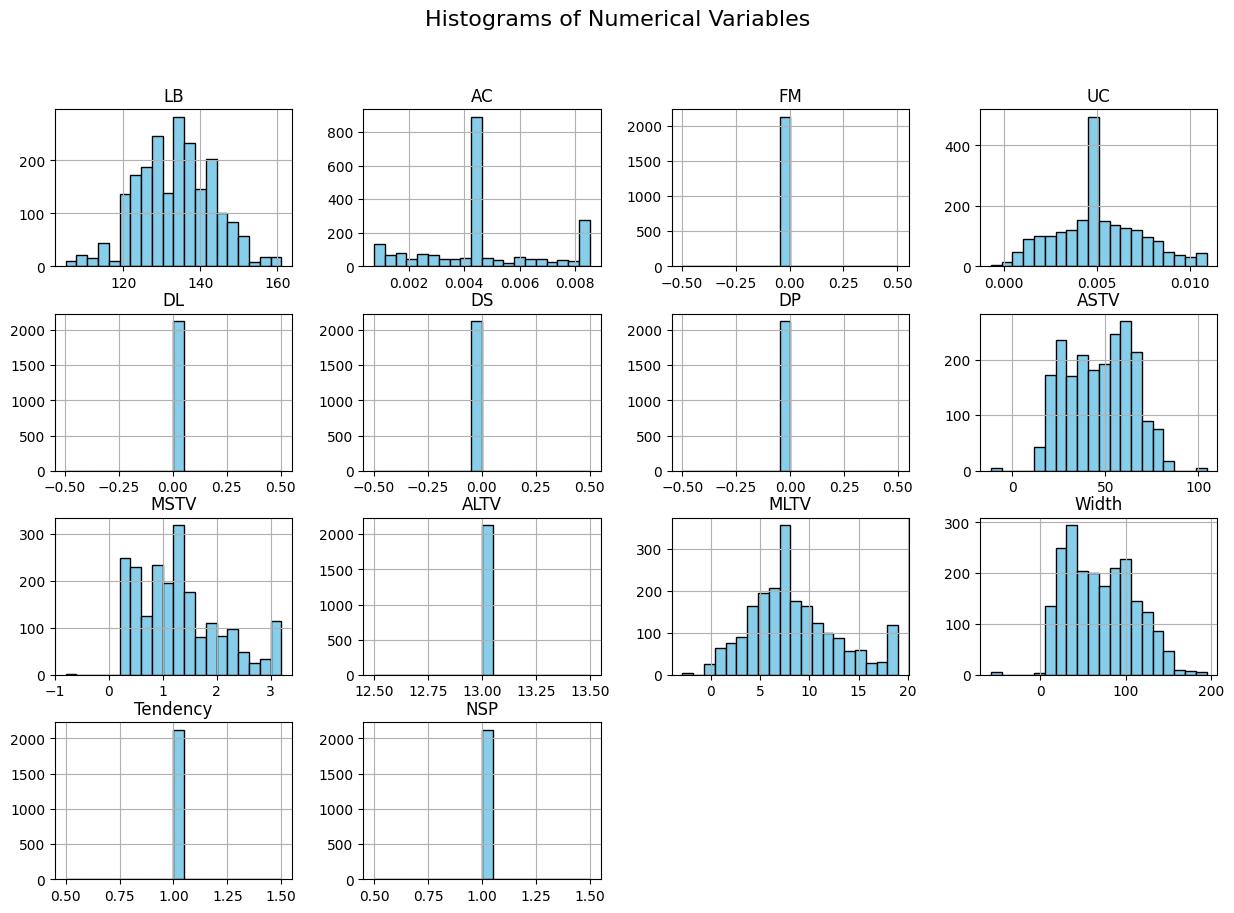

In [43]:
df_capped.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

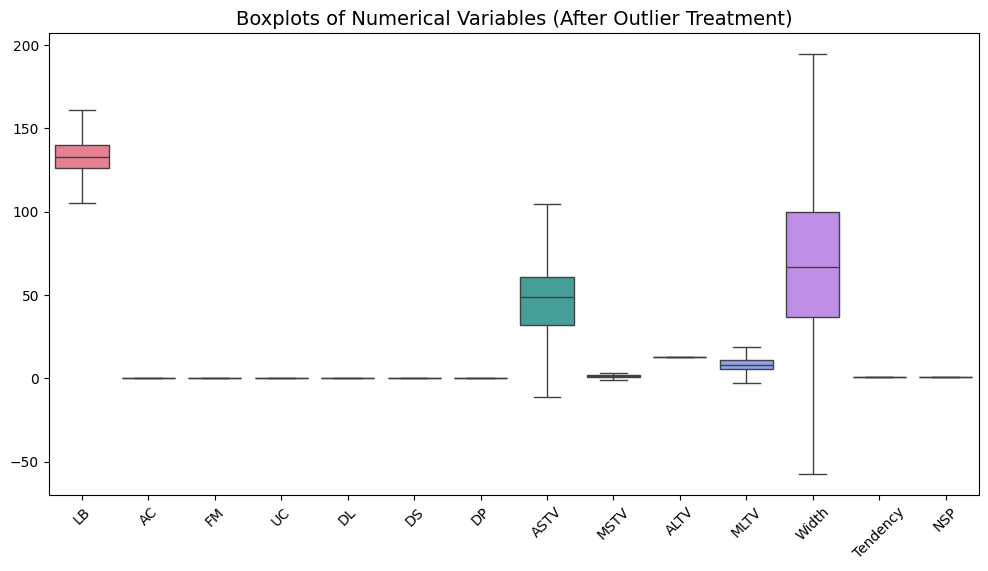

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_capped)
plt.title("Boxplots of Numerical Variables (After Outlier Treatment)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\kanch\AppData\Local\Temp\ipykernel_24632\3765833672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df_capped, palette='viridis')


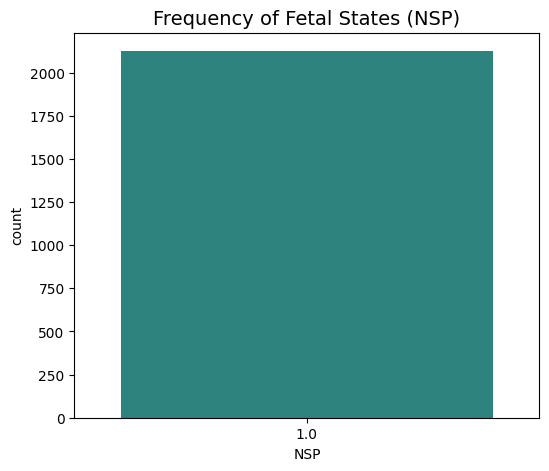

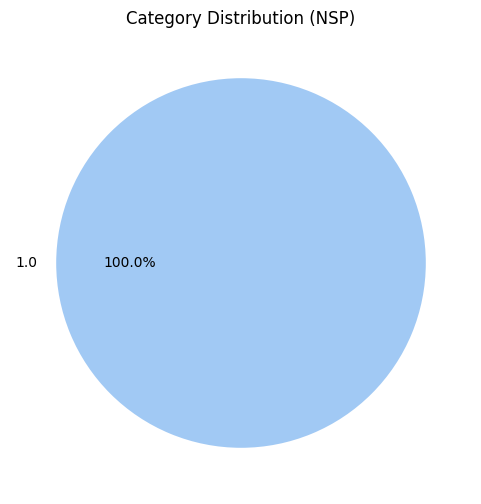

In [47]:
if 'NSP' in df_capped.columns:
    plt.figure(figsize=(6,5))
    sns.countplot(x='NSP', data=df_capped, palette='viridis')
    plt.title("Frequency of Fetal States (NSP)", fontsize=14)
    plt.show()
    
    df_capped['NSP'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette("pastel"))
    plt.title("Category Distribution (NSP)")
    plt.ylabel("")
    plt.show()

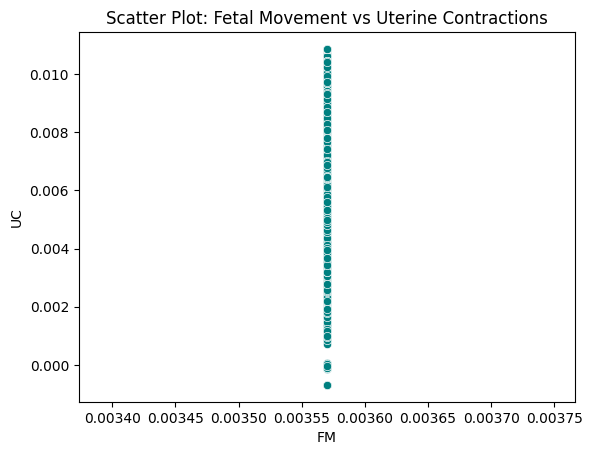

In [48]:
sns.scatterplot(x='FM', y='UC', data=df_capped, color='teal')
plt.title("Scatter Plot: Fetal Movement vs Uterine Contractions")
plt.show()

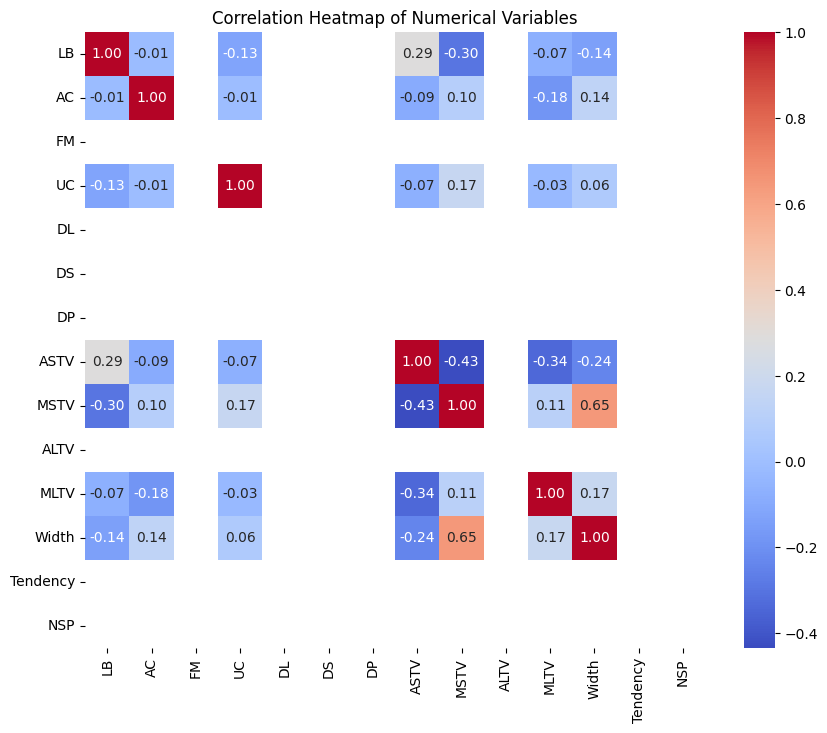

In [49]:
plt.figure(figsize=(10,8))
corr = df_capped.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

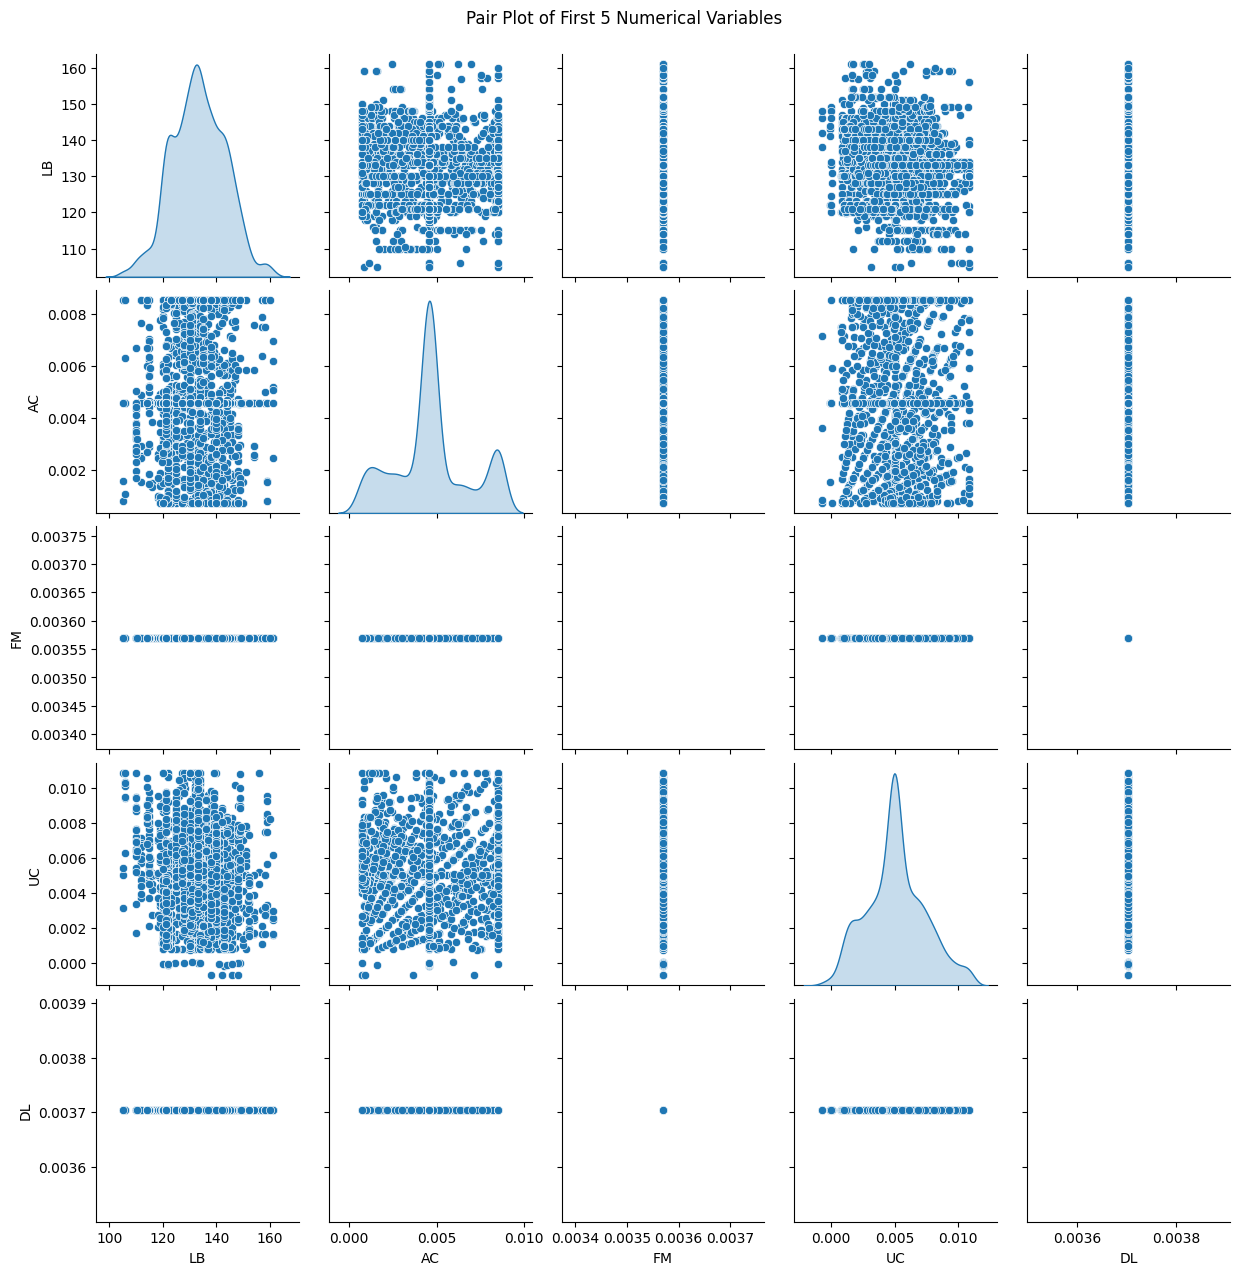

In [50]:
sns.pairplot(df_capped.iloc[:, :5], diag_kind='kde')
plt.suptitle("Pair Plot of First 5 Numerical Variables", y=1.02)
plt.show()

In [57]:
print(df_capped['UC'].unique())
print(df_capped['UC'].value_counts())


[0.00501044 0.00637959 0.00830565 ... 0.00697924 0.00686274 0.00610998]
UC
0.005010    318
0.010873     30
0.000834     24
0.001668     15
0.002502     12
           ... 
0.004825      1
0.004111      1
0.003425      1
0.004032      1
0.006711      1
Name: count, Length: 1338, dtype: int64


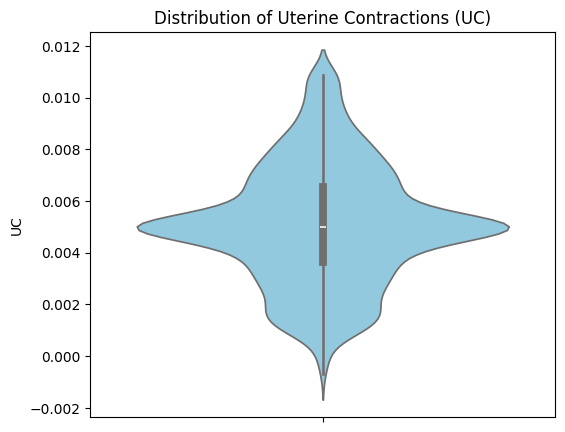

In [66]:
plt.figure(figsize=(6,5))
sns.violinplot(y='UC', data=df_capped, color='skyblue')
plt.title("Distribution of Uterine Contractions (UC)")
plt.show()

4.	Pattern Recognition and Insights:                                                            
●	Identify any correlations between variables and discuss their potential implications.                                 
●	Look for trends or patterns over time if temporal data is available.                          


In [60]:
corr_matrix = df_capped.corr(numeric_only=True)

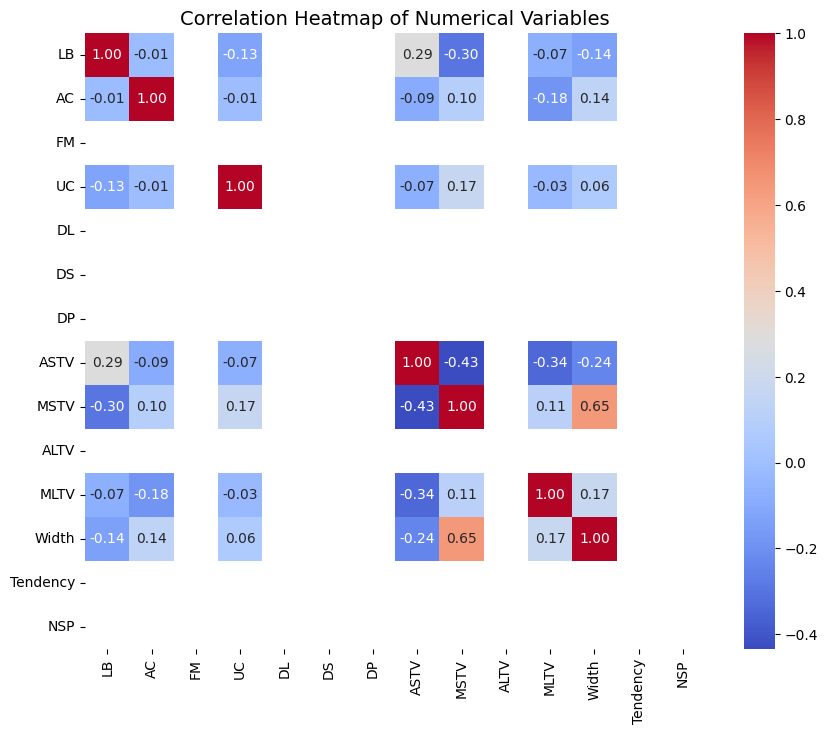

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()

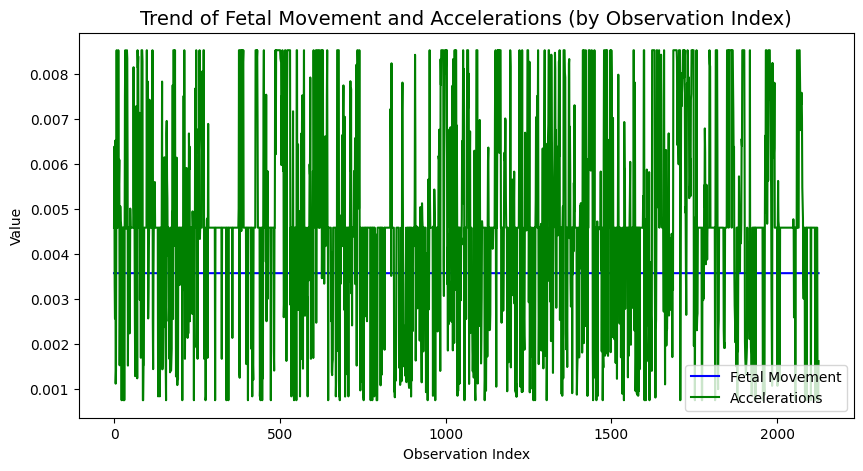

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(df_capped)), y='FM', data=df_capped, color='blue', label='Fetal Movement')
sns.lineplot(x=range(len(df_capped)), y='AC', data=df_capped, color='green', label='Accelerations')
plt.title("Trend of Fetal Movement and Accelerations (by Observation Index)", fontsize=14)
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.show()


5.	Conclusion:                                                                                  
●	Summarize the key insights and patterns discovered through your exploratory analysis.                           
●	Discuss how these findings could impact decision-making or further analyses.            


Key Insights from the Analysis                                       
                                   
Data Cleaning and Preparation:               
                                      
* Missing values were handled by replacing invalid zeros with medians.
                                                              
* All numerical features were converted to proper numeric types.                      
                                                                                                  
* Outliers were treated using capping (winsorization) to reduce extreme values without losing data.

Statistical Summary:                        
                                  
* Most physiological variables (AC, FM, UC) had mean ≈ median, indicating fairly symmetric distributions.          
                              
* Variables like FM and UC showed higher variability, while deceleration-related features (DL, DS, DP) had very low variance.                               
                                
* Outlier treatment slightly reduced spread, making the dataset more stable for modeling.                    
                                 
Data Visualization:
                               
* Histograms and boxplots revealed the overall distributions and confirmed successful outlier capping.    
                     
* Bar charts and pie charts indicated that the dataset primarily contains “Normal” fetal states (NSP = 1).          
                         
* Correlation heatmaps showed positive correlation between AC and FM, and strong correlation between ALTV and MLTV.   
           
* Advanced plots like violin and pair plots highlighted feature distributions and relationships across different observations.                          
                                          
Pattern Recognition and Insights:             
                    
* Strong correlation between AC and FM suggests that fetal movement and accelerations are linked — a potential indicator of fetal well-being.          
                  
* Weak correlation among deceleration features indicates independent physiological patterns, useful for detecting abnormal conditions.                         
                            
* Temporal trends could not be fully analyzed due to the lack of a time column, but sequential patterns could still be visualized using observation indices.



Implications for Decision-Making and Further Analysis        
                              
Clinical Decision Support:     
            
Features like FM, AC, and UC can be prioritized for monitoring fetal health. High correlation among these measures could help in developing early warning systems.            
                               
Feature Selection for Modeling:      
              
Strong correlations among some features (e.g., ALTV and MLTV) suggest redundancy, which can guide dimensionality reduction methods like PCA for machine learning models.                 
                                     
Data Quality Improvements:                
                                   
Future datasets should include temporal or sequence identifiers to enable more detailed trend analysis and predictive modeling.                                 

Outlier Handling and Robust Analysis:              
                                        
Capping outliers preserves dataset size while reducing extreme influence, ensuring that statistical summaries and models remain reliable.                
